# MNIST Handwritten Digit Recognition

# Import necessary libraries


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.backends.backend_pdf
import numpy as np

# Load the dataset


In [18]:
data = pd.read_csv('data.csv')

In [19]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
data.shape

(42000, 785)

# Data Preparation for Model Building


In [21]:
y=data['label']
x=data.drop('label',axis=1)

In [22]:
type(x)

pandas.core.frame.DataFrame

6


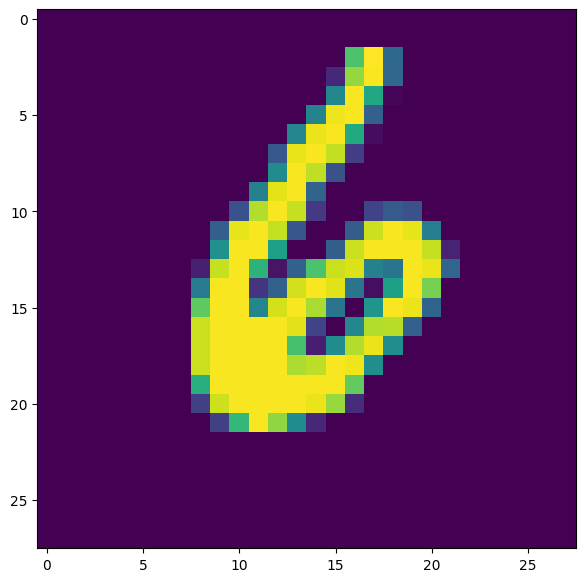

In [23]:
plt.figure(figsize=(7,7))
some_digit=1266
some_digit_image = x.iloc[some_digit].to_numpy()
plt.imshow(np.reshape(some_digit_image, (28,28)))
print(y[some_digit])

<Axes: xlabel='label', ylabel='count'>

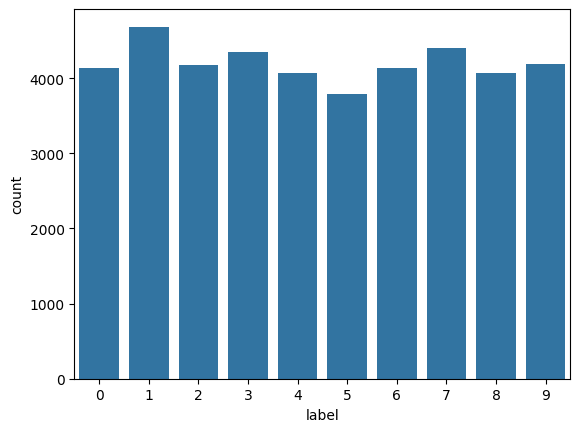

In [24]:
sns.countplot( x='label', data=data) 

#### We can conclude that our dataset is balanced

# Models 
# KNN


### Implementing one scenario (70:30 split and K=5) 


In [25]:
test_size = 0.30
k = 5
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=40)


In [26]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((29400, 784), (29400,), (12600, 784), (12600,))

In [27]:
#from sklearn.preprocessing import  StandardScaler
#scaler = StandardScaler()
#scaler.fit(x_train,y_train)
#x_train = scaler.transform(x_train)
#x_train.shape

# Train the KNN model and make predictions


In [28]:
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results for one scenario


In [29]:
print(f'Test size: {test_size}, K: {k}, Accuracy: {accuracy}')
print("Classification Report:")
print(class_report)

Test size: 0.3, K: 5, Accuracy: 0.9635714285714285
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1236
           1       0.95      1.00      0.97      1370
           2       0.99      0.96      0.97      1252
           3       0.95      0.96      0.96      1369
           4       0.97      0.96      0.97      1215
           5       0.95      0.95      0.95      1132
           6       0.97      0.99      0.98      1216
           7       0.96      0.97      0.96      1326
           8       0.98      0.92      0.95      1197
           9       0.94      0.94      0.94      1287

    accuracy                           0.96     12600
   macro avg       0.96      0.96      0.96     12600
weighted avg       0.96      0.96      0.96     12600



# Save confusion matrix to PDF


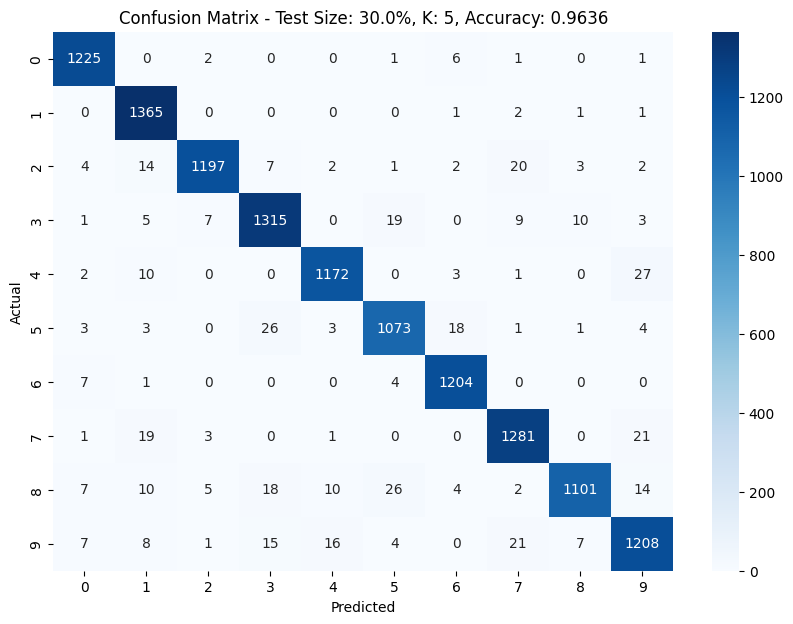

In [30]:
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f'Confusion Matrix - Test Size: {test_size*100}%, K: {k}, Accuracy: {accuracy:.4f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(f'conf_matrix_test{test_size*100}_k{k}.png')
plt.show()

# Save classification report to a text file


In [31]:
with open(f'classification_report_test{test_size*100}_k{k}.txt', 'w') as file:
    file.write(f'Test size: {test_size}, K: {k}, Accuracy: {accuracy}\n')
    file.write("Classification Report:\n")
    file.write(class_report)
    file.write("\n\n")

# Other scenarios:  (commented)

### Loop over all scenarios 


In [32]:
results = []
test_sizes = [0.40, 0.30, 0.25, 0.20, 0.10, 0.05]
k_values = [2, 4, 5, 6, 7, 10]
for test_size in test_sizes:
    for k in k_values:
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=40)
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
        results.append((test_size, k, accuracy, conf_matrix, class_report))
        print(f'Test size: {test_size}, K: {k}, Accuracy: {accuracy}')
        print("Classification Report:")
        print(class_report)

Test size: 0.4, K: 2, Accuracy: 0.9542857142857143
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1617
           1       0.95      1.00      0.97      1871
           2       0.97      0.96      0.97      1713
           3       0.93      0.96      0.94      1803
           4       0.95      0.97      0.96      1642
           5       0.93      0.94      0.94      1506
           6       0.98      0.98      0.98      1612
           7       0.94      0.96      0.95      1752
           8       0.98      0.87      0.93      1588
           9       0.96      0.89      0.93      1696

    accuracy                           0.95     16800
   macro avg       0.96      0.95      0.95     16800
weighted avg       0.95      0.95      0.95     16800

Test size: 0.4, K: 4, Accuracy: 0.9613095238095238
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00     

## Save all results to PDF


In [33]:
pdf = matplotlib.backends.backend_pdf.PdfPages("knn_results.pdf")

for test_size, k, accuracy, conf_matrix, _ in results:
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - Test Size: {test_size*100}%, K: {k}, Accuracy: {accuracy:.4f}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    pdf.savefig()
    plt.close()

pdf.close()

## Save accuracy results in a CSV for further analysis


In [34]:
df_results = pd.DataFrame(results, columns=['Test Size', 'K', 'Accuracy', 'Confusion Matrix', 'Classification Report'])
df_results.drop(columns=['Confusion Matrix', 'Classification Report'], inplace=True)
df_results.to_csv('knn_accuracy_results.csv', index=False)